In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.python.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
tf.random.set_seed(1234567890)

170498071/170498071 [==============================] - 3s 0us/step


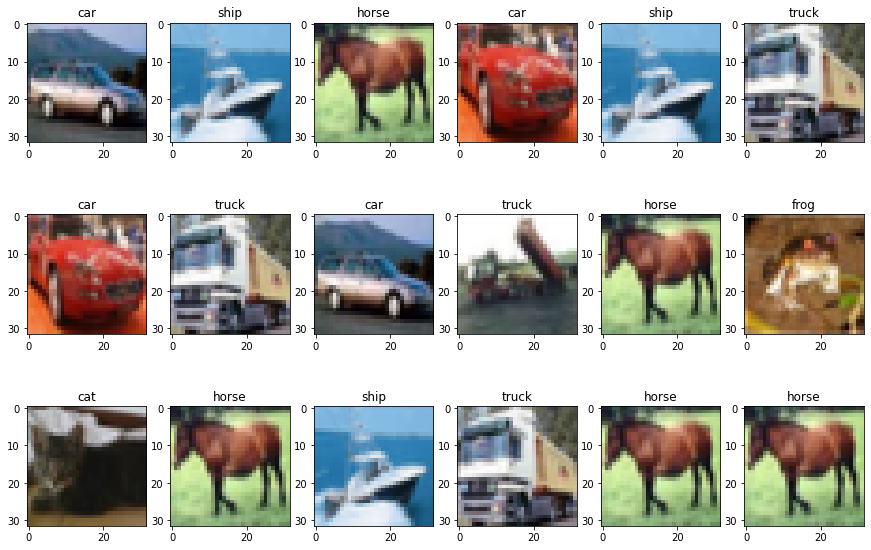

In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, num_classes)
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

In [4]:
print(x_train.shape)

(50000, 32, 32, 3)


In [5]:
# Compute the class histogram
from collections import Counter
hist = Counter(classes)

### Step 1: Data Preparation

In [6]:
# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

In [7]:
inputs = Input(shape=(size, size, 3))

net = Conv2D(16, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

# Build the classifier
model = Model(inputs, outputs)

# Show the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                20490 

### Step 3: Training

In [8]:
# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [9]:
epochs = 10
batch_size = 128

# Train the model
start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/10
352/352 [==============================] - 47s 131ms/step - loss: 1.7011 - accuracy: 0.3935 - val_loss: 1.5001 - val_accuracy: 0.4622
Epoch 2/10
352/352 [==============================] - 45s 128ms/step - loss: 1.3780 - accuracy: 0.5160 - val_loss: 1.2885 - val_accuracy: 0.5556
Epoch 3/10
352/352 [==============================] - 48s 136ms/step - loss: 1.2488 - accuracy: 0.5614 - val_loss: 1.2205 - val_accuracy: 0.5764
Epoch 4/10
352/352 [==============================] - 45s 127ms/step - loss: 1.1637 - accuracy: 0.5939 - val_loss: 1.1548 - val_accuracy: 0.6028
Epoch 5/10
352/352 [==============================] - 46s 130ms/step - loss: 1.1029 - accuracy: 0.6170 - val_loss: 1.1036 - val_accuracy: 0.6136
Epoch 6/10
352/352 [==============================] - 44s 126ms/step - loss: 1.0507 - accuracy: 0.6339 - val_loss: 1.0639 - val_accuracy: 0.6320
Epoch 7/10
352/352 [==============================] - 45s 129ms/step - loss: 1.0126 - accuracy: 0.6492 - val_loss: 1.0171 - val_ac

Train Acc      0.6749777793884277
Validation Acc 0.6675999760627747


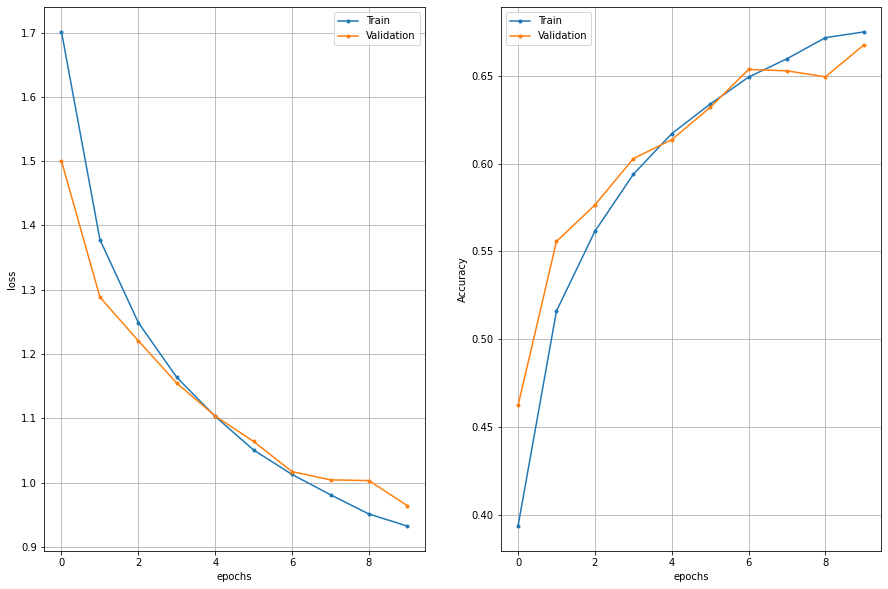

In [10]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In [11]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[0:5])
print('Pred', np.argmax(y_pred[0:5, :], axis=1))
print('Pred', y_pred[0:5, :])
print(y_pred.shape)

True [3 8 8 0 6]
Pred [3 1 8 8 6]
Pred [[4.84833913e-03 3.54892923e-04 1.81179140e-02 7.17474878e-01
  4.64984449e-03 1.74728215e-01 5.29314354e-02 5.49878343e-04
  2.53877137e-02 9.56899952e-04]
 [2.76248325e-02 6.00896180e-01 2.18443183e-05 4.00239787e-06
  1.38055066e-06 1.18841285e-07 6.51753567e-07 2.82241160e-07
  3.49936336e-01 2.15143729e-02]
 [2.01313838e-01 2.85947502e-01 1.66700152e-03 3.38968704e-03
  7.13554735e-04 7.08141888e-04 2.71215424e-04 2.11287779e-03
  4.39359814e-01 6.45162836e-02]
 [3.31046790e-01 2.45454937e-01 2.28908788e-02 5.85996429e-04
  6.18186372e-04 1.48386443e-05 4.01438563e-04 1.90699764e-04
  3.70959610e-01 2.78366394e-02]
 [8.25385905e-06 1.15293231e-04 4.34018252e-03 6.71529621e-02
  1.01997338e-01 4.62109596e-03 8.21130276e-01 2.26546999e-05
  5.71332697e-04 4.06418367e-05]]
(10000, 10)


In [12]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():

    acc = 
    print(class_name, acc)

In [13]:
digits = range(0, 10)
y_pred = np.argmax(y_pred, axis=0)

for digit in digits:
    mask = y_true == digit
    
    tp = np.sum(y_pred[mask] == digit)
    total = np.sum(mask)
    
    print('Digit-', digit, ' acc', tp/total)
    
print('y_true', y_true[mask])
print('y_pred', y_pred[mask])

IndexError: ignored

In [ ]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

In [ ]:
for ii in range(15):
    idx = np.random.randint(0, len(y_pred))
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...], cmap='gray')
    plt.title('True: ' + str(y_true[idx]) + ' | Pred: ' + str(y_pred[idx]))